In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

1. Iris dataset:

In [14]:
# Load iris dataset:

np.random.seed = 2021
from sklearn.datasets import load_iris

iris = load_iris()
print ('data contains:',iris.keys())

X, y, labels, feature_names  = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris= pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y
features_dict = {k:v for k,v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris.head(20)

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [15]:
# Separate the data and corresponding labels into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2021)

# Normalize the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier for different K and finding best k
from sklearn.neighbors import KNeighborsClassifier
k_values = range(1,100)

best_K = 0
best_score = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Training a model on training data
    knn_classifier.fit(X_train, y_train)
    
    # Evaluating model accuracy on test data
    score = knn_classifier.score(X_test, y_test)
    
    # finding best k and best score
    if score > best_score:
        best_score = score
        best_K = k
    
print(f'The best K = {best_K}, score = {best_score}')    

The best K = 5, score = 0.9666666666666667


2. Synthetic dataset

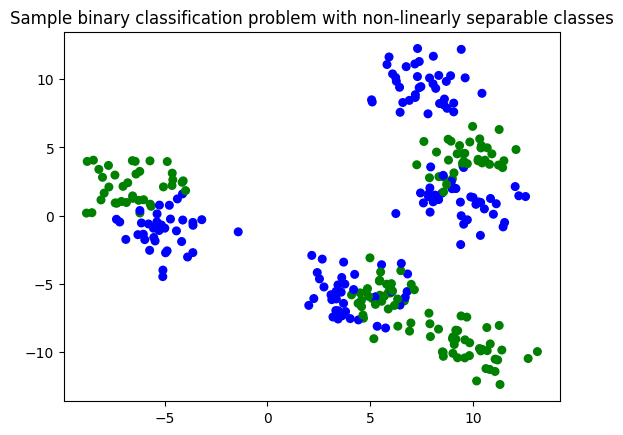

In [16]:
# Generrate synthetic dataset

from sklearn.datasets import make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples = 300, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=30, cmap=cmap_bold)

In [17]:
# Split to train and test
X_D2_train, X_D2_test, y_D2_train, y_D2_test = train_test_split(X_D2, y_D2, test_size=0.2, random_state=2021)

# Normalize the data
scaler = MinMaxScaler()
X_D2_train = scaler.fit_transform(X_D2_train)
X_D2_test = scaler.transform(X_D2_test)

# Train a KNN classifier for different K and finding best k
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1,100)

best_k = 0
best_score = 0

for K in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=K)
    
    # Training a model on training data
    knn_classifier.fit(X_D2_train, y_D2_train)
    
    # Evaluating model accuracy on test data
    score = knn_classifier.score(X_D2_test, y_D2_test)
    
    if score > best_score:
        best_score = score
        best_k = K
        

print(f'The best K: {best_k}, score : {best_score}')



The best K: 31, score : 0.9333333333333333


Visualize the decision boundary:

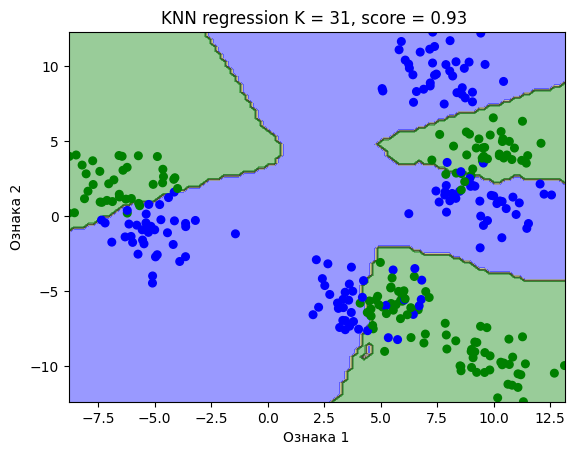

In [18]:
X_range = np.linspace(X_D2[:,0].min(), X_D2[:,0].max(), 100)
Y_range = np.linspace(X_D2[:,1].min(), X_D2[:,1].max(), 100)
X_range, Y_range = np.meshgrid(X_range, Y_range)
XY_range = np.c_[X_range.ravel(), Y_range.ravel()]

knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_D2, y_D2)
Z = knn_best.predict(XY_range)
Z = Z.reshape(X_range.shape)

plt.contourf(X_range, Y_range, Z, cmap=cmap_bold, alpha=0.4)
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2, marker='o', s=30, cmap=cmap_bold)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('KNN regression K = {}, score = {} '.format(best_k, best_score.round(2)))
plt.show()
